In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Visualisasi Eksperimen Algoritma Pembelajaran

In [29]:
ppo = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PPO_HumanoidBulletEnv-v0-Low_166df_00000_0_2021-04-25_19-33-42/progress.csv")
pg = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PG_HumanoidBulletEnv-v0-Low_14b1b_00000_0_2021-04-27_16-10-51/progress.csv")
pg2 = pd.read_csv("~/ray_results/HWalk_Low_Mimic/PG_HumanoidBulletEnv-v0-Low_d6346_00000_0_2021-04-26_09-07-57/progress.csv")
a2c = pd.read_csv("~/ray_results/HWalk_Low_Mimic/A2C_HumanoidBulletEnv-v0-Low_7dbb0_00000_0_2021-04-27_17-25-22/progress.csv")
a2c2 = pd.read_csv("~/ray_results/HWalk_Low_Mimic/A2C_HumanoidBulletEnv-v0-Low_f2fa8_00000_0_2021-04-26_20-50-16/progress.csv")

In [30]:
ppo_10M = ppo[ppo['timesteps_total'] <= 10000000]
ppo_reward_mean = ppo_10M['episode_reward_mean']
ppo_eps_len_mean = ppo_10M['episode_len_mean']

pg_10M = pg[pg['timesteps_total'] <= 10000000]
pg_reward_mean = pg_10M['episode_reward_mean']
pg_eps_len_mean = pg_10M['episode_len_mean']

a2c_10M = a2c[a2c['timesteps_total'] <= 10000000]
a2c_reward_mean = a2c_10M['episode_reward_mean']
a2c_eps_len_mean = a2c_10M['episode_len_mean']

pg_10M_2 = pg2[pg2['timesteps_total'] <= 10000000]
pg_reward_mean_2 = pg_10M_2['episode_reward_mean']
pg_eps_len_mean_2 = pg_10M_2['episode_len_mean']

a2c_10M_2 = a2c2[a2c2['timesteps_total'] <= 10000000]
a2c_reward_mean_2 = a2c_10M_2['episode_reward_mean']
a2c_eps_len_mean_2 = a2c_10M_2['episode_len_mean']

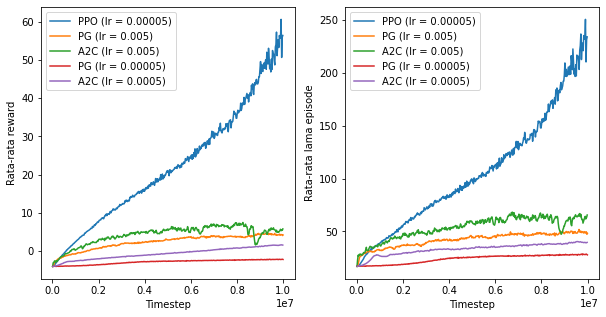

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(ppo_10M['timesteps_total'], ppo_reward_mean)
ax1.plot(pg_10M['timesteps_total'], pg_reward_mean)
ax1.plot(a2c_10M['timesteps_total'], a2c_reward_mean)
ax1.plot(pg_10M_2['timesteps_total'], pg_reward_mean_2)
ax1.plot(a2c_10M_2['timesteps_total'], a2c_reward_mean_2)
ax1.set_xlabel('Timestep')
ax1.set_ylabel('Rata-rata reward')
ax1.legend(['PPO (lr = 0.00005)', 'PG (lr = 0.005)', 'A2C (lr = 0.005)', 'PG (lr = 0.00005)', 'A2C (lr = 0.0005)'])

ax2.plot(ppo_10M['timesteps_total'], ppo_eps_len_mean)
ax2.plot(pg_10M['timesteps_total'], pg_eps_len_mean)
ax2.plot(a2c_10M['timesteps_total'], a2c_eps_len_mean)
ax2.plot(pg_10M_2['timesteps_total'], pg_eps_len_mean_2)
ax2.plot(a2c_10M_2['timesteps_total'], a2c_eps_len_mean_2)
ax2.set_xlabel('Timestep')
ax2.set_ylabel('Rata-rata lama episode')
ax2.legend(['PPO (lr = 0.00005)', 'PG (lr = 0.005)', 'A2C (lr = 0.005)', 'PG (lr = 0.00005)', 'A2C (lr = 0.0005)'])

fig.savefig('img/Komparasi algo.png')
plt.show()

# Visualisasi Eksperimen Agen Tunggal dan Bertingkat

In [8]:
with open("Log/data_2021-04-30_23-26-25_1690.json") as fp:
    data_run_low = json.load(fp)

with open("Log/hier_data_2021-05-01_17-03-09_1320.json") as fp:
    data_run_hier = json.load(fp)

with open("Log/data_2021-05-01_23-32-16_1610.json") as fp:
    data_walk_low = json.load(fp)

with open("Log/hier_data_2021-05-02_12-26-15_960.json") as fp:
    data_walk_hier = json.load(fp)

In [10]:
data_run_low.keys()

dict_keys(['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '200', '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350'])

In [11]:
data_run_low['0']['drift']

[0.3505081544771772,
 0.23343788939771995,
 0.3885322874202587,
 0.29272422388301483,
 0.2669371751459114,
 0.316542241681753,
 0.22413029111704547,
 0.350154778421369,
 0.30812549422560614,
 0.24373528980591733]

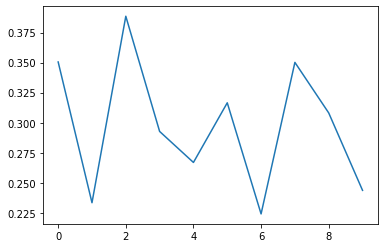

In [12]:
plt.plot(data_run_low['0']['drift'])

In [7]:
def calc_mean(data, key):
    return [np.mean(data[x][key]) for x in data]

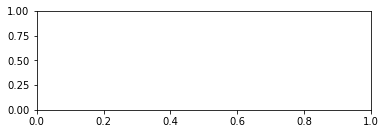

In [20]:
a = plt.subplot(2, 1, 1)

[Text(0.5, 0, 'Derajat Target'), Text(0, 0.5, 'Simpangan (meter)')]

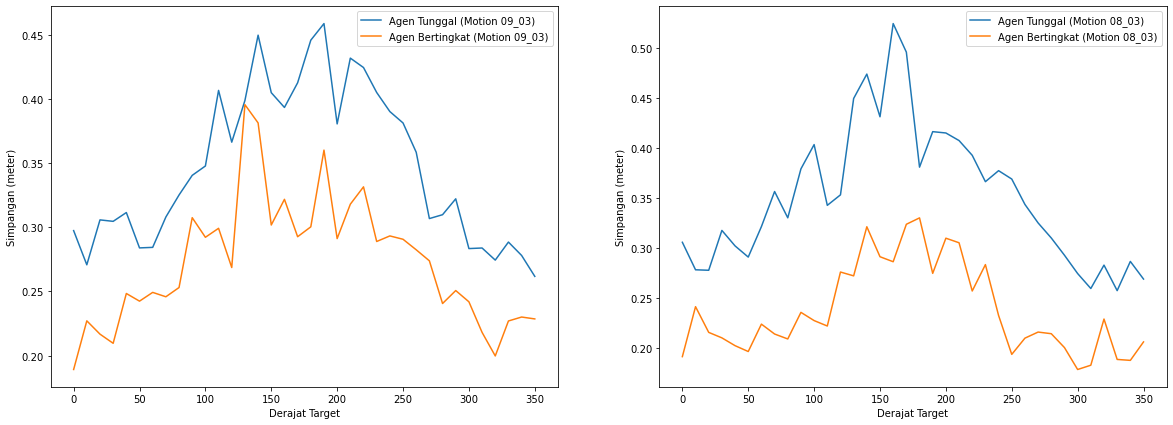

In [27]:
x_data = [10 * x for x in range(36)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(x_data, calc_mean(data_run_low, 'drift'))
ax1.plot(x_data, calc_mean(data_run_hier, 'drift'))
ax2.plot(x_data, calc_mean(data_walk_low, 'drift'))
ax2.plot(x_data, calc_mean(data_walk_hier, 'drift'))

ax1.legend(["Agen Tunggal (Motion 09_03)", "Agen Bertingkat (Motion 09_03)"])
ax2.legend(["Agen Tunggal (Motion 08_03)", "Agen Bertingkat (Motion 08_03)"])

ax1.set(xlabel='Derajat Target', ylabel='Simpangan (meter)')
ax2.set(xlabel='Derajat Target', ylabel='Simpangan (meter)')

[Text(0.5, 0, 'Derajat Target'), Text(0, 0.5, 'Timestep')]

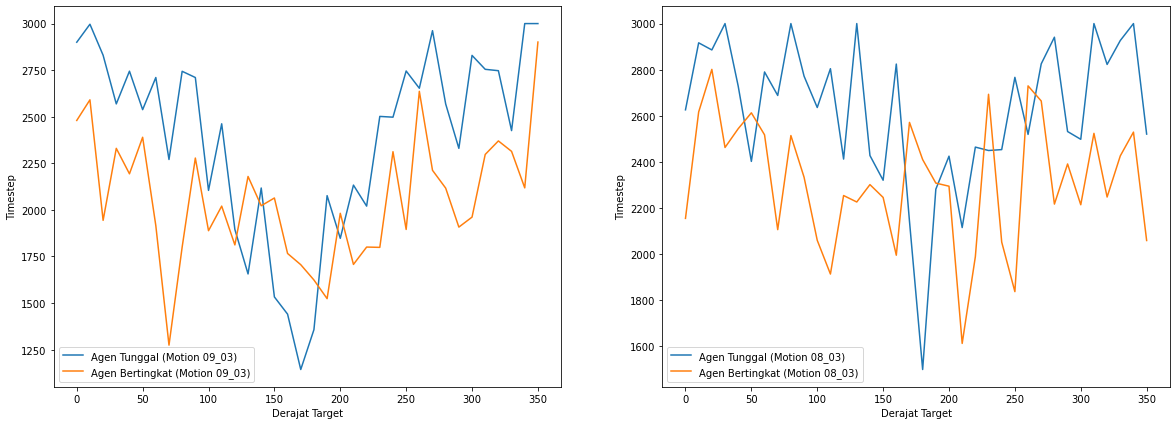

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.plot(x_data, calc_mean(data_run_low, 'timestep'))
ax1.plot(x_data, calc_mean(data_run_hier, 'timestep'))
ax2.plot(x_data, calc_mean(data_walk_low, 'timestep'))
ax2.plot(x_data, calc_mean(data_walk_hier, 'timestep'))

ax1.legend(["Agen Tunggal (Motion 09_03)", "Agen Bertingkat (Motion 09_03)"])
ax2.legend(["Agen Tunggal (Motion 08_03)", "Agen Bertingkat (Motion 08_03)"])

ax1.set(xlabel='Derajat Target', ylabel='Timestep')
ax2.set(xlabel='Derajat Target', ylabel='Timestep')